# Image Classification Using Convolutional Neural Network

In [1]:
## Import relevant packages
import numpy as np
import pandas as pd
import os, os.path
import tensorflow as tf
import cv2 
import keras
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image 

Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


In [2]:
# To fix random seed for reproduciblity and prevent randomness
seed = 7
rand = numpy.random.RandomState(seed)

In [4]:
## Count total number of images in Train folder
list = os.listdir("Train") # dir is the path of the directory 
number_folders = len(list)
print("Different classes of images present in the train folder: " + str(number_folders))

Different classes of images present in the train folder: 46


In [5]:
# To Count total number of images in Train folder
length = 0
for root, dirs, files in os.walk("Train"):
    length += len(files)
print("Total images present in the train folder are: "+str(length))

Total images present in the train folder are: 78200


In [310]:
# Append folder name to filenames in all sub folders
for root, dirs, files in os.walk('train'):
    if not files:
        continue
    # prefix consists of subfolder names contained in directory 
    prefix = os.path.basename(root)
    for f in files:
        os.rename(os.path.join(root, f), os.path.join(root, "{}_{}".format(prefix, f)))   

In [8]:
### List of all files in a directory
files = []
# r=root, d=directories, f = files
for r, d, f in os.walk("Train"):
    for file in f:
        if '.png' in file:
            files.append(os.path.join(r, file))

In [9]:
import csv

In [11]:
##It extract all images from one folder one by one
## Stores their labels
## Read image file and  image to grey scale
## flatten each image one by one 
## stores in a list 
###Then stores image pixel information from list into csv format excel file
## one image pixels in one row

train_labels = []
train_images = []
train_image_shapes = []

count = 0
count_label = 0

for file in files:
    path = file.split(os.sep)
  
    #To extract only file name from comma seperated file name and directory name
    label = os.path.basename(file)
    label = os.path.splitext(label)[0]
            
    ##remove last characters from string            
    label_minus_last6 = label.rsplit('_',1)
    
     ## To read each image in grayscale
    img_file_gray = cv2.imread(file, cv2.IMREAD_GRAYSCALE)## wait as it takes some time

    ##To convert image in gray scale and save in a list
    img_file = img_file_gray.astype('float')

    train_images.append( img_file_gray)
    train_image_shapes.append(img_file_gray.shape)
            
    #To save the label of each image as a list named train_labels         
    train_labels.append(label_minus_last6[0])  

     
    ###To save result in csv file without filename
    with open('train_labels.csv', 'a', newline= '') as tlabel:
        filewriter = csv.writer(tlabel)
        filewriter.writerow([train_labels[count_label]])
        count_label = count_label + 1

    ##open an excel file in csv format to append the content from list generated above
       with open('train.csv', 'a', newline= '') as myfile:
        filewriter = csv.writer(myfile)
        filewriter.writerow( train_images[count].flatten())
        count = count+1    

### c) Dimension of all the images 

In [12]:
from operator import itemgetter    
print("max pixel values: ") 
print(max(train_image_shapes,key=itemgetter(1)))

print("min pixel values: ") 
print(min(train_image_shapes, key=itemgetter(1)))

print("\n""No, all images do not have 28 pixels by 28 pixels values instead they have 32 pixels by 32 pixels" )

max pixel values: 
(32, 32)
min pixel values: 
(32, 32)

No, all images do not have 28 pixels by 28 pixels values instead they have 32 pixels by 32 pixels


In [44]:
#Count files in each subfolder or label

files_count = []
for root, dirs, files in os.walk("train"):
    count = 0
    path = root.split(os.sep)
    if os.path.basename(root) != '.':
        label = os.path.basename(root)
        #print(label)
    for file in files:
        count += 1
    #print(count)
    files_count.append(count)
   # i += 1

#To remove first element stored in list which is zero
files_count.pop(0)

#Gives the total number of files in each of subfolders of the Train folder
print("The total number of files in each of subfolders of the Train folder: " + "\n"+ str(files_count))  

The total number of subfolders or classes in train directory: 46

The total number of files in each of subfolders of the Train folder: 
[1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700]


### Build Image classifier using Convolutional Neural Network

In [16]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#Read label in Panda dataframe
#Read file and assign label name as label
X_train_label = pd.read_csv("Train_labels.csv", names = ['Labels'])

In [18]:
X_train_label.head()

,Labels
0,character_10_yna
1,character_10_yna
2,character_10_yna
3,character_10_yna
4,character_10_yna


In [19]:
X_train_label.shape

(78200, 1)

In [20]:
len(unique(X_train_label))

46

In [21]:
uniq_label = unique(X_train_label.Labels)

In [22]:
uniq_label

array(['character_10_yna', 'character_11_taamatar', 'character_12_thaa',
       'character_13_daa', 'character_14_dhaa', 'character_15_adna',
       'character_16_tabala', 'character_17_tha', 'character_18_da',
       'character_19_dha', 'character_1_ka', 'character_20_na',
       'character_21_pa', 'character_22_pha', 'character_23_ba',
       'character_24_bha', 'character_25_ma', 'character_26_yaw',
       'character_27_ra', 'character_28_la', 'character_29_waw',
       'character_2_kha', 'character_30_motosaw',
       'character_31_petchiryakha', 'character_32_patalosaw',
       'character_33_ha', 'character_34_chhya', 'character_35_tra',
       'character_36_gya', 'character_3_ga', 'character_4_gha',
       'character_5_kna', 'character_6_cha', 'character_7_chha',
       'character_8_ja', 'character_9_jha', 'digit_0', 'digit_1',
       'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6', 'digit_7',
       'digit_8', 'digit_9'], dtype=object)

In [23]:
## Create a dictionary of labels
label_dic ={}
for i in range(46):
    label_dic.update({i:uniq_label[i]})
label_dic

{0: 'character_10_yna',
 1: 'character_11_taamatar',
 2: 'character_12_thaa',
 3: 'character_13_daa',
 4: 'character_14_dhaa',
 5: 'character_15_adna',
 6: 'character_16_tabala',
 7: 'character_17_tha',
 8: 'character_18_da',
 9: 'character_19_dha',
 10: 'character_1_ka',
 11: 'character_20_na',
 12: 'character_21_pa',
 13: 'character_22_pha',
 14: 'character_23_ba',
 15: 'character_24_bha',
 16: 'character_25_ma',
 17: 'character_26_yaw',
 18: 'character_27_ra',
 19: 'character_28_la',
 20: 'character_29_waw',
 21: 'character_2_kha',
 22: 'character_30_motosaw',
 23: 'character_31_petchiryakha',
 24: 'character_32_patalosaw',
 25: 'character_33_ha',
 26: 'character_34_chhya',
 27: 'character_35_tra',
 28: 'character_36_gya',
 29: 'character_3_ga',
 30: 'character_4_gha',
 31: 'character_5_kna',
 32: 'character_6_cha',
 33: 'character_7_chha',
 34: 'character_8_ja',
 35: 'character_9_jha',
 36: 'digit_0',
 37: 'digit_1',
 38: 'digit_2',
 39: 'digit_3',
 40: 'digit_4',
 41: 'digit_5',
 

In [24]:
# Produce numeric labels from categorical classes using scikit.
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
X_train_label["Labels"] = lb_make.fit_transform(X_train_label["Labels"])

In [25]:
X_train_label["Labels"].head(11)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
Name: Labels, dtype: int32

In [26]:
## Converts dataframe into a numpy array
x = np.array(X_train)

In [27]:
## Creats target matrix 
y = keras.utils.to_categorical(np.array(X_train_label["Labels"]),46)

In [28]:
## Shuffles both train and train labels keeping index position same in both
index = np.random.permutation(len(x))
x,y = x[index],y[index]

In [29]:
x.shape

(78200, 1024)

In [30]:
y.shape

(78200, 46)

In [31]:
##Normalizes pixel intensities
x=x/255.0

In [32]:
## Standard imports of classes from keras

from keras.models import Sequential

## To add convolutional layers inside neural network  architecture
from keras.layers.convolutional import Conv2D 

## ## Dense for fully connected network and Flatten for in flattening of images
from keras.layers.core import Dense,Flatten

## To downsample image data
from keras.layers.pooling import MaxPooling2D

from keras.utils import np_utils
from keras.optimizers import SGD

## To avoid overfitting
from keras.layers import Dropout

from keras.layers.normalization import BatchNormalization

In [33]:
## Create the architecture or configuration of convolutional neural network
model=Sequential()

## The first hidden layer is convolutional layer 
model.add(Conv2D(filters=6,kernel_size=(3,3),padding='same',input_shape=(32,32,1)))

## And a maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Batch normalization
model.add(BatchNormalization())

##And again a convolutional layer
model.add(Conv2D(filters=16,kernel_size=(3,3),padding='valid'))

## And again a maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Batch normalization
model.add(BatchNormalization())

## Then flattened operation to create a fully connected layer
model.add(Flatten())

model.add(Dropout(0.40,seed=100))##

## After flattening we have fully connected relu layer 
#Again a relu layer and then a output of softmax layer 
model.add(Dense(120,activation='relu'))
model.add(Dense(84,activation='relu'))
model.add(Dense(46,activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [34]:
## Here is compiler 
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [35]:
##Reshaping: nrows,32,32,1 channel (images are in greyscale)
x_train=x.reshape(x.shape[0],32,32,1)

In [36]:
## Training of convolutional neural network
history=model.fit(x_train,y,epochs=10,batch_size=1000,validation_split=0.20, shuffle = True)

Instructions for updating:
Use tf.cast instead.
Train on 62560 samples, validate on 15640 samples
Epoch 1/10
62560/62560 [==============================] - 53s 842us/step - loss: 1.5202 - acc: 0.5848 - val_loss: 0.7367 - val_acc: 0.7884
Epoch 2/10
62560/62560 [==============================] - 52s 826us/step - loss: 0.4049 - acc: 0.8747 - val_loss: 0.2617 - val_acc: 0.9203
Epoch 3/10
62560/62560 [==============================] - 52s 827us/step - loss: 0.2681 - acc: 0.9163 - val_loss: 0.2082 - val_acc: 0.9364
Epoch 4/10
62560/62560 [==============================] - 52s 825us/step - loss: 0.2172 - acc: 0.9304 - val_loss: 0.1611 - val_acc: 0.9503
Epoch 5/10
62560/62560 [==============================] - 52s 833us/step - loss: 0.1817 - acc: 0.9415 - val_loss: 0.1538 - val_acc: 0.9526
Epoch 6/10
62560/62560 [==============================] - 52s 829us/step - loss: 0.1577 - acc: 0.9493 - val_loss: 0.1439 - val_acc: 0.9556
Epoch 7/10
62560/62560 [==============================] - 52s 828us/

In [37]:
#Read test data in panda dataframe
X_test=pd.read_csv("test_X.csv")

In [38]:
X_test.shape

(13800, 1024)

In [39]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
## Creates np array of test matrix
x_text=np.array(X_test)

## Normalizes the test matrix 
x_test=x_text/255.0

##Reshapes the normalized test matrix
x_test=x_test.reshape(x_test.shape[0],32,32,1)

In [41]:
#To save predicted tabel of test data in csv file named as pred
count = 0 
test_label = []
header = ['Label']

with open('pred.csv', 'a', newline= '') as predict:
    filewriter = csv.writer(predict)
    filewriter.writerow(header)
    
    # Prediction as probability vector for each test image
    for i in range(x_test.shape[0]):
        p = model.predict_proba(x_test[i,:,:].reshape(1,32,32,1))
        indx = np.argmax(p)
        filewriter.writerow([label_dic[indx]])
        count = count + 1    

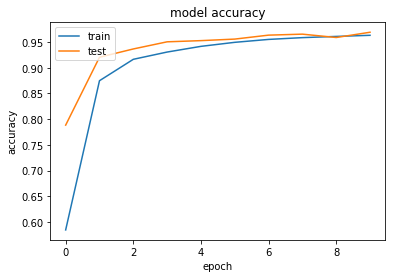

In [42]:
## Check for overfit
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

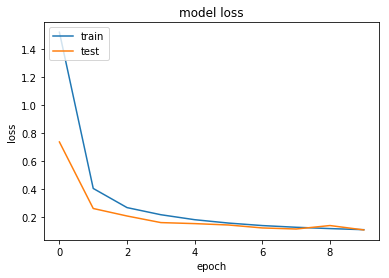

In [43]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()